In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

In [23]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)




Pearson correlation between Average Completion Rate and Happiness: r = 0.53, p-value = 1.95e-07


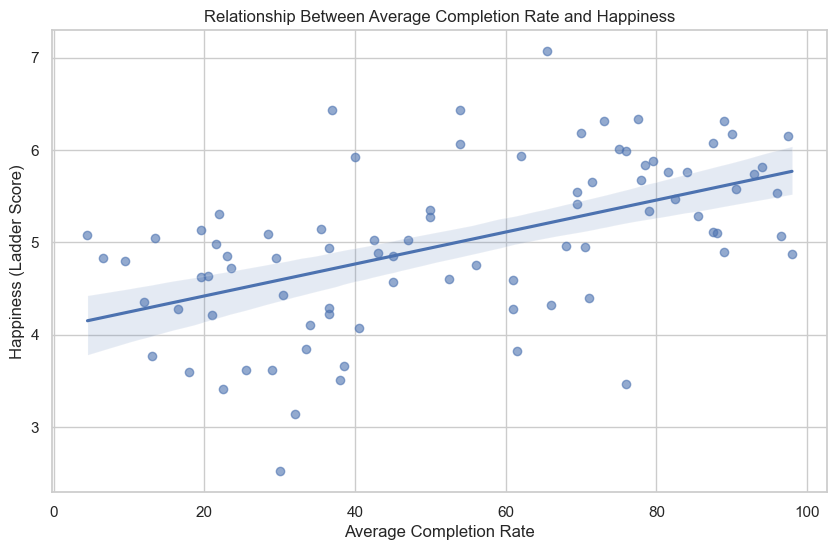

In [24]:
# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', scatter_kws={'alpha': 0.6})
plt.title('Relationship Between Average Completion Rate and Happiness')
plt.xlabel('Average Completion Rate')
plt.ylabel('Happiness (Ladder Score)')
plt.grid(True)

# Calculate Pearson correlation coefficient and p-value
r, p_value = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Completion Rate and Happiness: r = {r:.2f}, p-value = {p_value:.2e}')

plt.show()


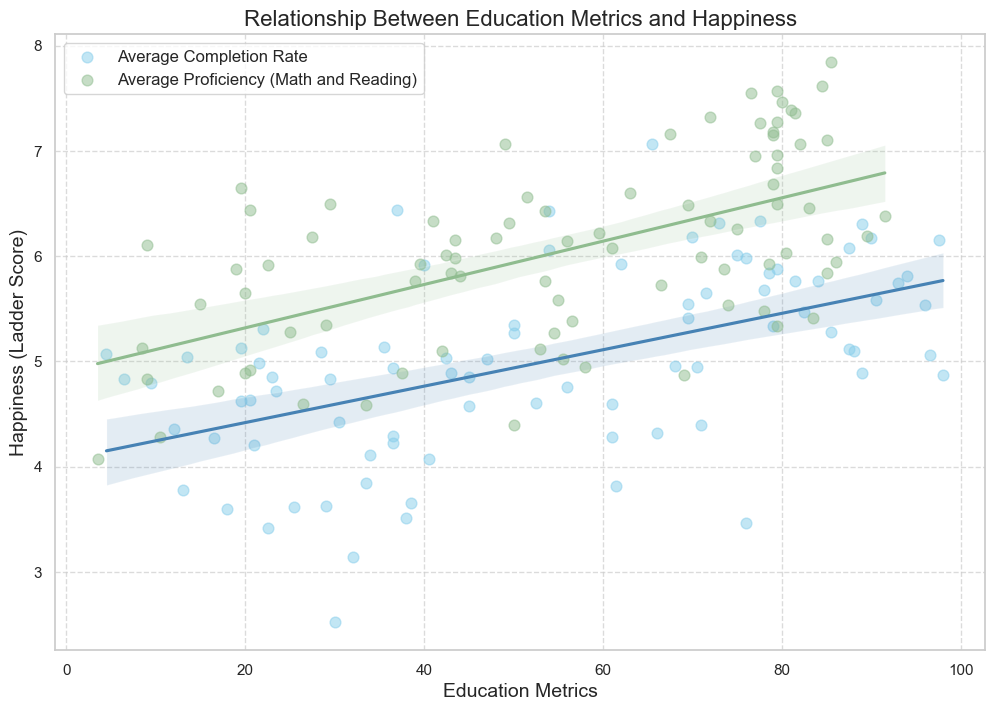

Pearson correlation between Average Completion Rate and Happiness: r = 0.53, p-value = 1.95e-07
Pearson correlation between Average Proficiency and Happiness: r = 0.59, p-value = 3.30e-09


In [25]:


# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Calculate the Average Proficiency (Math and Reading)
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out entries with 0 values in the Average Proficiency
filtered_proficiency_data = df[df['Average_Proficiency'] != 0]

# Create a combined scatter plot with regression lines for both variables with improved aesthetics
plt.figure(figsize=(12, 8))

# Plot Average Completion Rate and Happiness
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'steelblue'}, 
            label='Average Completion Rate', color='skyblue')

# Plot Average Proficiency and Happiness
sns.regplot(data=filtered_proficiency_data, x='Average_Proficiency', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'darkseagreen'}, 
            label='Average Proficiency (Math and Reading)', color='darkseagreen')

# Add titles and labels with improved aesthetics
plt.title('Relationship Between Education Metrics and Happiness', fontsize=16)
plt.xlabel('Education Metrics', fontsize=14)
plt.ylabel('Happiness (Ladder Score)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the style of the plot to improve aesthetics
sns.set_style("whitegrid")

plt.show()

# Calculate Pearson correlation coefficients and p-values
r_completion, p_value_completion = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
r_proficiency, p_value_proficiency = pearsonr(filtered_proficiency_data['Average_Proficiency'], filtered_proficiency_data['Ladder score'])

print(f'Pearson correlation between Average Completion Rate and Happiness: r = {r_completion:.2f}, p-value = {p_value_completion:.2e}')
print(f'Pearson correlation between Average Proficiency and Happiness: r = {r_proficiency:.2f}, p-value = {p_value_proficiency:.2e}')


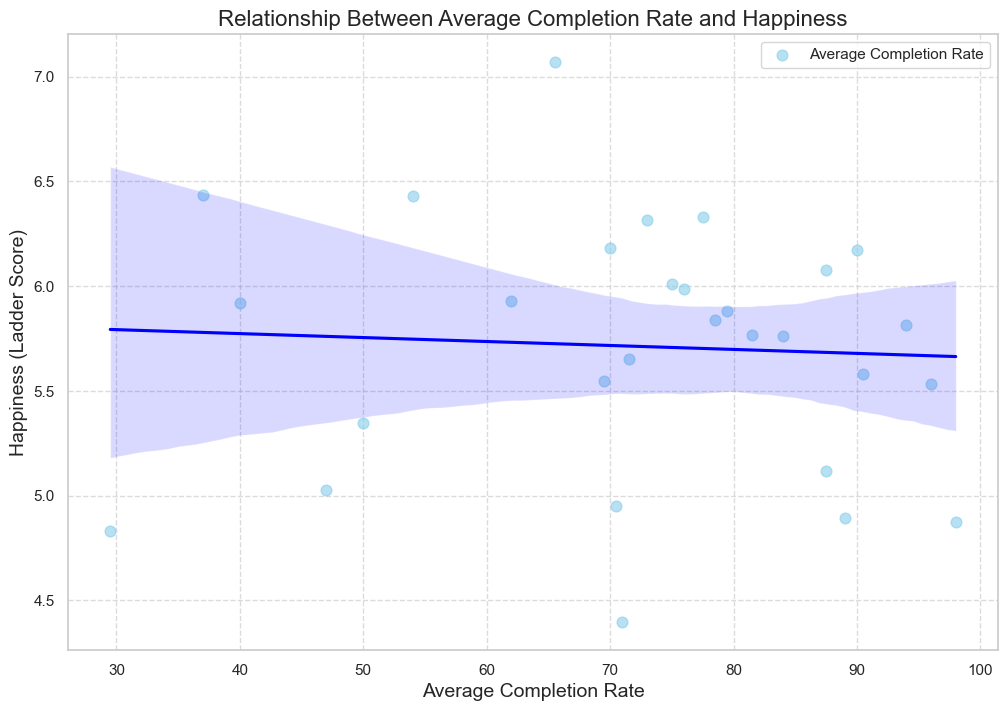

Pearson correlation between Average Completion Rate and Happiness: r = -0.06, p-value = 7.68e-01


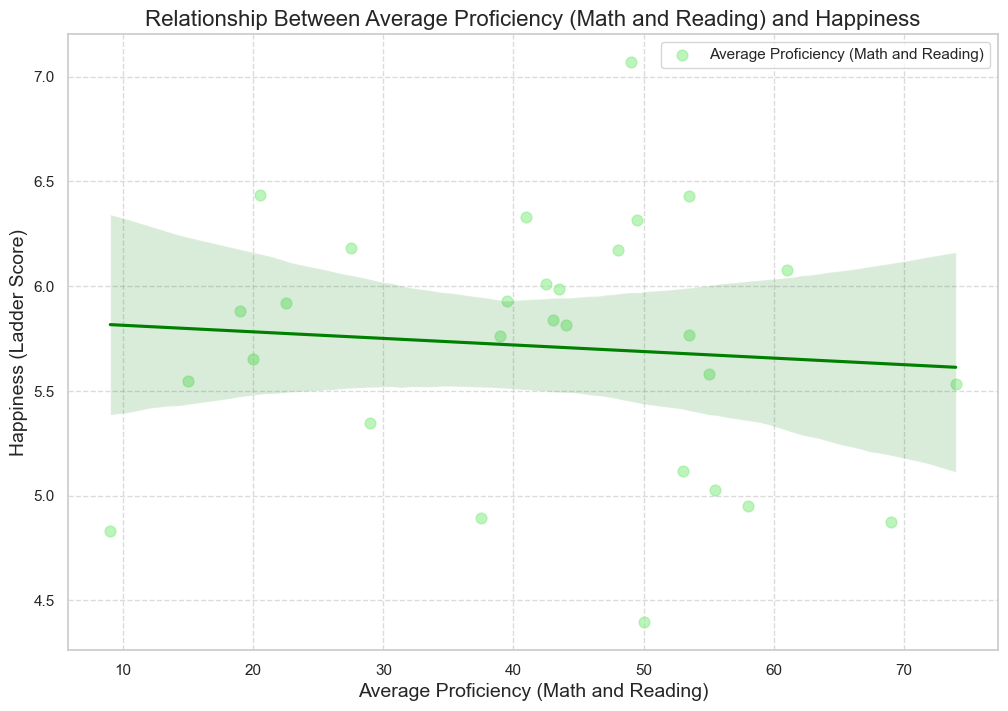

Pearson correlation between Average Proficiency and Happiness: r = -0.09, p-value = 6.60e-01


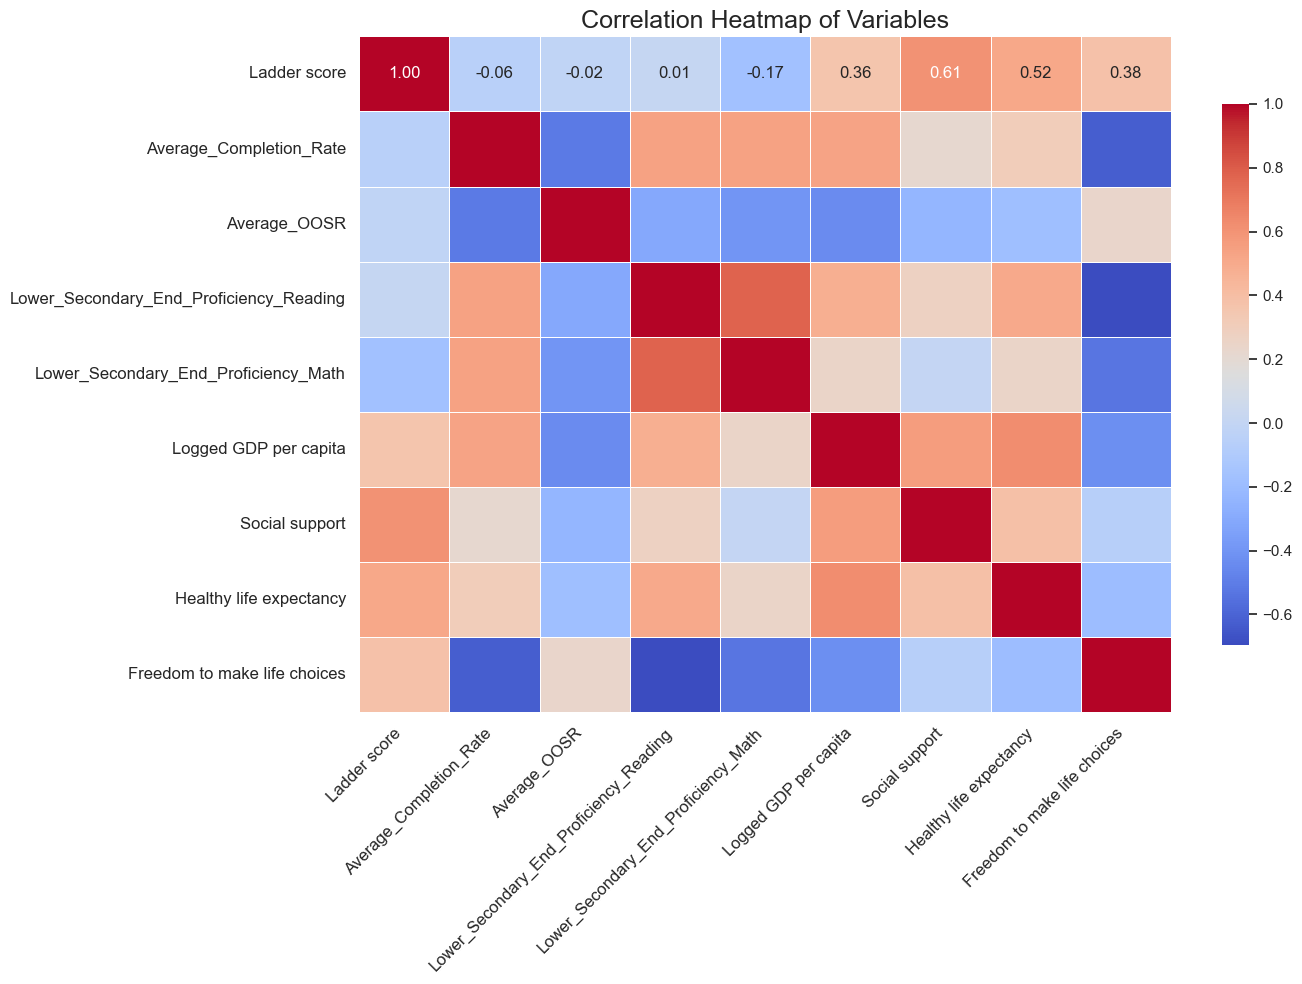

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Recalculate the necessary columns
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)
df['Average_OOSR'] = df[['Average_OOSR_Male', 'Average_OOSR_Female']].mean(axis=1)
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Exclude rows with zero values in the relevant columns
filtered_data = df[(df['Average_Completion_Rate'] != 0) & (df['Average_OOSR'] != 0) & 
                   (df['Lower_Secondary_End_Proficiency_Reading'] != 0) & (df['Lower_Secondary_End_Proficiency_Math'] != 0)]

# Scatter plot for Average Completion Rate and Happiness
plt.figure(figsize=(12, 8))
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', scatter_kws={'alpha': 0.6, 's': 60}, line_kws={'color': 'blue'}, label='Average Completion Rate', color='skyblue')
plt.title('Relationship Between Average Completion Rate and Happiness', fontsize=16)
plt.xlabel('Average Completion Rate', fontsize=14)
plt.ylabel('Happiness (Ladder Score)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient for Average Completion Rate and Happiness
r_completion, p_value_completion = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Completion Rate and Happiness: r = {r_completion:.2f}, p-value = {p_value_completion:.2e}')

# Scatter plot for Average Proficiency (Math and Reading) and Happiness
plt.figure(figsize=(12, 8))
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Ladder score', scatter_kws={'alpha': 0.6, 's': 60}, line_kws={'color': 'green'}, label='Average Proficiency (Math and Reading)', color='lightgreen')
plt.title('Relationship Between Average Proficiency (Math and Reading) and Happiness', fontsize=16)
plt.xlabel('Average Proficiency (Math and Reading)', fontsize=14)
plt.ylabel('Happiness (Ladder Score)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient for Average Proficiency and Happiness
r_proficiency, p_value_proficiency = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Proficiency and Happiness: r = {r_proficiency:.2f}, p-value = {p_value_proficiency:.2e}')

# Select relevant columns for the heatmap
heatmap_data = filtered_data[['Ladder score', 'Average_Completion_Rate', 'Average_OOSR', 
                              'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math', 
                              'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                              'Freedom to make life choices']]

# Compute the correlation matrix
corr = heatmap_data.corr()

# Create a heatmap with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")

# Draw the heatmap
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Heatmap of Variables', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Improve spacing
plt.tight_layout()

# Display the heatmap
plt.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_7096\861810119.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



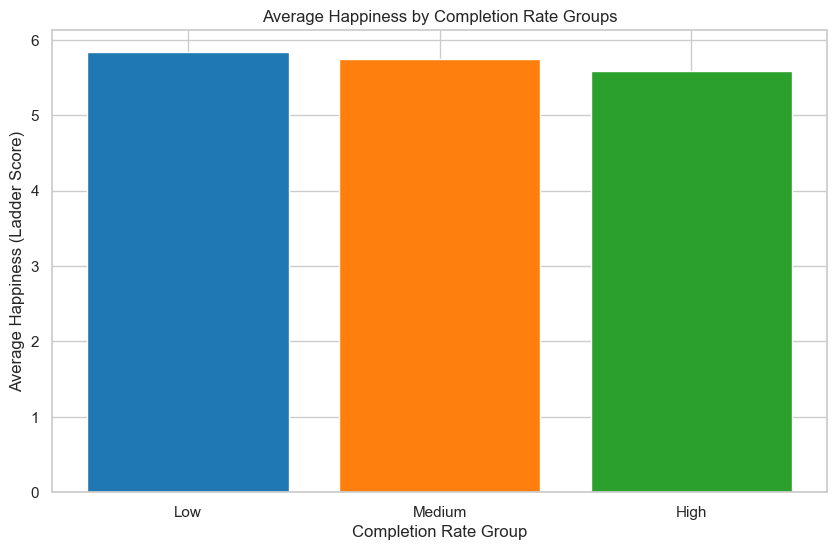

    Group  countries  avg_completion_rate  avg_happiness
0     Low          9            50.500000       5.836444
1  Medium          9            73.666667       5.740000
2    High         11            88.863636       5.588273
Bins: IntervalIndex([(-1, 8], (8, 17], (17, 28]], dtype='interval[int64, right]')
Group Size: 9


C:\Users\stanp\AppData\Local\Temp\ipykernel_7096\861810119.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
# Split data into three evenly sized groups by increasing average completion rates
filtered_data = filtered_data.sort_values('Average_Completion_Rate').reset_index(drop=True)
group_size = len(filtered_data) // 3
groups = ['Low', 'Medium', 'High']
filtered_data['Group'] = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1], labels=groups)

# Calculate the average happiness for each group
grouped_data = filtered_data.groupby('Group')['Ladder score'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Group'], grouped_data['Ladder score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Happiness by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Average Happiness (Ladder Score)')
plt.grid(True)
plt.show()

# Calculate the group information
group_info = filtered_data.groupby('Group').agg(
    countries=('Country', 'count'),
    avg_completion_rate=('Average_Completion_Rate', 'mean'),
    avg_happiness=('Ladder score', 'mean')
).reset_index()

# Calculate the bin edges for each group
bins = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1])

# Display the group information
print(group_info)
print(f"Bins: {bins.categories}")
print(f"Group Size: {group_size}")

c:\Users\stanp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



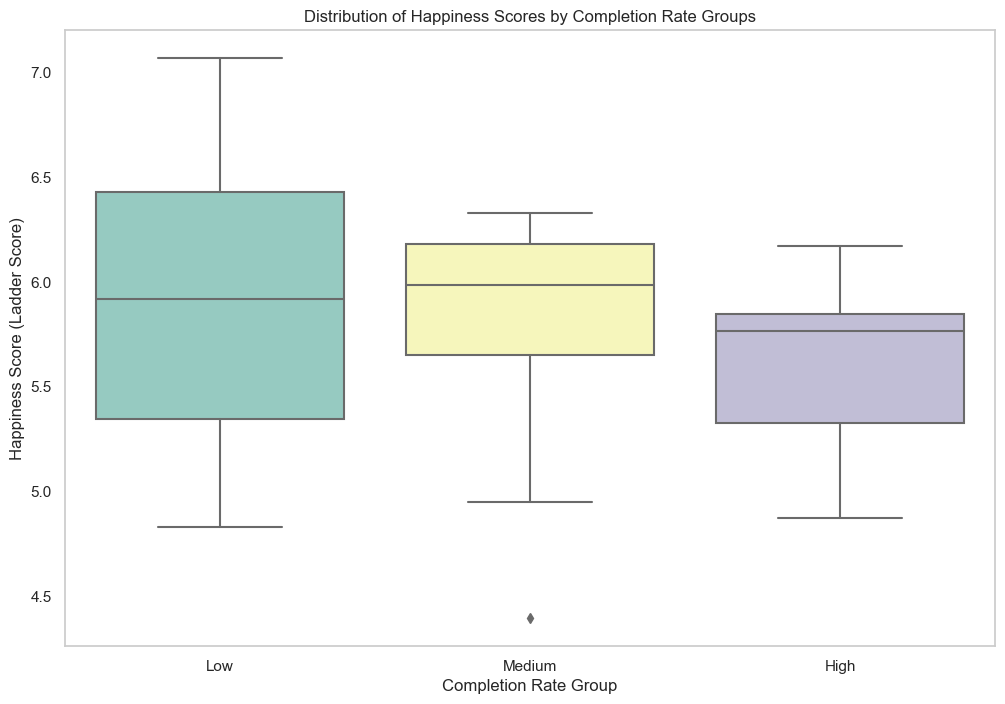

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the happiness scores by completion rate group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Ladder score', data=filtered_data, palette='Set3')
plt.title('Distribution of Happiness Scores by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Happiness Score (Ladder Score)')
plt.grid(axis='y')
plt.show()


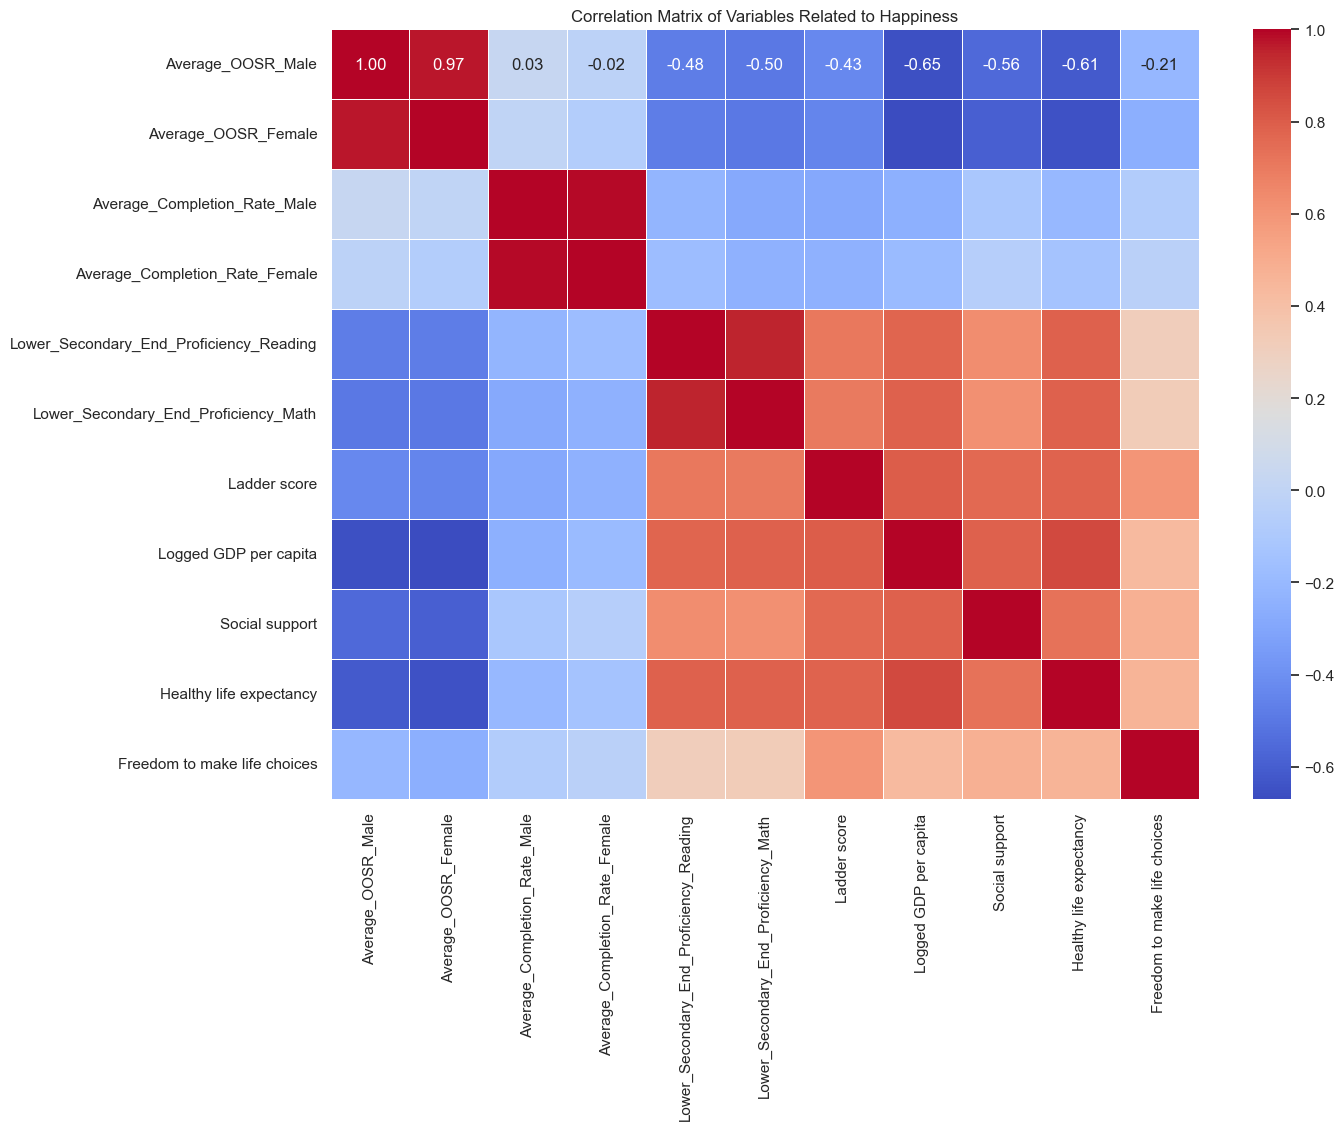

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Average_OOSR_Male', 'Average_OOSR_Female', 'Average_Completion_Rate_Male', 
                           'Average_Completion_Rate_Female', 'Lower_Secondary_End_Proficiency_Reading', 
                           'Lower_Secondary_End_Proficiency_Math', 'Ladder score', 'Logged GDP per capita', 
                           'Social support', 'Healthy life expectancy', 'Freedom to make life choices']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables Related to Happiness')
plt.show()


In [30]:

# Create a world map plot of the ladder score per country
fig = px.choropleth(data_frame=df,
                    locations='Country',
                    locationmode='country names',
                    color='Ladder score',
                    color_continuous_scale='RdYlGn',
                    title='World Happiness Ladder Score by Country')

# Display the interactive plot
fig.show()


In [31]:

# Calculate the average completion rate and filter out countries with zero values
df['Average_Completion_Rate'] = (df['Average_Completion_Rate_Male'] + df['Average_Completion_Rate_Female']) / 2
filtered_data = df[(df['Average_Completion_Rate_Male'] > 0) & (df['Average_Completion_Rate_Female'] > 0)]

# Create a world map plot of the average completion rate per country
fig = px.choropleth(data_frame=filtered_data,
                    locations='Country',
                    locationmode='country names',
                    color='Average_Completion_Rate',
                    color_continuous_scale='RdYlGn',
                    title='Average Completion Rate by Country')

# Display the interactive plot
fig.show()




In [32]:


# Calculate the average OOSR (Out of School Rate) and filter out countries with zero values
df['Average_OOSR'] = (df['Average_OOSR_Male'] + df['Average_OOSR_Female']) / 2
filtered_oosr_data = df[(df['Average_OOSR_Male'] > 0) & (df['Average_OOSR_Female'] > 0)]

# Create a world map plot of the average OOSR per country
fig = px.choropleth(data_frame=filtered_oosr_data,
                    locations='Country',
                    locationmode='country names',
                    color='Average_OOSR',
                    color_continuous_scale='RdYlGn_r',
                    title='Average Out of School Rate (OOSR) by Country')

# Display the interactive plot
fig.show()




In [33]:

# Filter out countries with zero values for Lower_Secondary_End_Proficiency_Reading
filtered_reading_data = df[dadfta['Lower_Secondary_End_Proficiency_Reading'] > 0]

# Create a world map plot for Lower_Secondary_End_Proficiency_Reading
fig = px.choropleth(data_frame=filtered_reading_data,
                    locations='Country',
                    locationmode='country names',
                    color='Lower_Secondary_End_Proficiency_Reading',
                    color_continuous_scale='RdYlGn',
                    title='Lower Secondary End Proficiency in Reading by Country')

# Display the interactive plot
fig.show()




NameError: name 'dadfta' is not defined

In [ ]:

# Filter out countries with zero values for Lower_Secondary_End_Proficiency_Math
filtered_math_data = df[df['Lower_Secondary_End_Proficiency_Math'] > 0]

# Create a world map plot for Lower_Secondary_End_Proficiency_Math
fig = px.choropleth(data_frame=filtered_math_data,
                    locations='Country',
                    locationmode='country names',
                    color='Lower_Secondary_End_Proficiency_Math',
                    color_continuous_scale='RdYlGn',
                    title='Lower Secondary End Proficiency in Math by Country')

# Display the interactive plot
fig.show()



All plot's combined

In [ ]:
import pandas as pd
import plotly.graph_objects as go



# Calculate additional columns needed
df['Average_Completion_Rate'] = (df['Average_Completion_Rate_Male'] + df['Average_Completion_Rate_Female']) / 2
df['Average_OOSR'] = (df['Average_OOSR_Male'] + df['Average_OOSR_Female']) / 2

# Create a combined world map plot with a dropdown menu for different variables
fig = go.Figure()

# Add traces for each variable
# Ladder score plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Ladder score'],
    colorscale='RdYlGn',
    colorbar_title='Ladder score',
    visible=True
))

# Average Completion Rate plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_Completion_Rate'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_Completion_Rate'] > 0]['Average_Completion_Rate'],
    colorscale='RdYlGn',
    colorbar_title='Average Completion Rate',
    visible=False
))

# Average OOSR plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_OOSR'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_OOSR'] > 0]['Average_OOSR'],
    colorscale='RdYlGn_r',
    colorbar_title='Average OOSR',
    visible=False
))

# Lower Secondary End Proficiency in Reading plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Lower_Secondary_End_Proficiency_Reading'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Reading',
    visible=False
))

# Lower Secondary End Proficiency in Math plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Lower_Secondary_End_Proficiency_Math'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Math',
    visible=False
))

# Create dropdown
dropdown_buttons = [
    {'label': 'Ladder score', 'method': 'update', 'args': [{'visible': [True, False, False, False, False]}, {'title': 'World Happiness Ladder Score by Country'}]},
    {'label': 'Average Completion Rate', 'method': 'update', 'args': [{'visible': [False, True, False, False, False]}, {'title': 'Average Completion Rate by Country'}]},
    {'label': 'Average OOSR', 'method': 'update', 'args': [{'visible': [False, False, True, False, False]}, {'title': 'Average Out of School Rate (OOSR) by Country'}]},
    {'label': 'Proficiency in Reading', 'method': 'update', 'args': [{'visible': [False, False, False, True, False]}, {'title': 'Lower Secondary End Proficiency in Reading by Country'}]},
    {'label': 'Proficiency in Math', 'method': 'update', 'args': [{'visible': [False, False, False, False, True]}, {'title': 'Lower Secondary End Proficiency in Math by Country'}]},
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title_text='World Maps with Dropdown'
)

# Display the interactive plot
fig.show()

